In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
df = pd.read_csv(r"D:\data science project\Publication\loan_data\train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [13]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

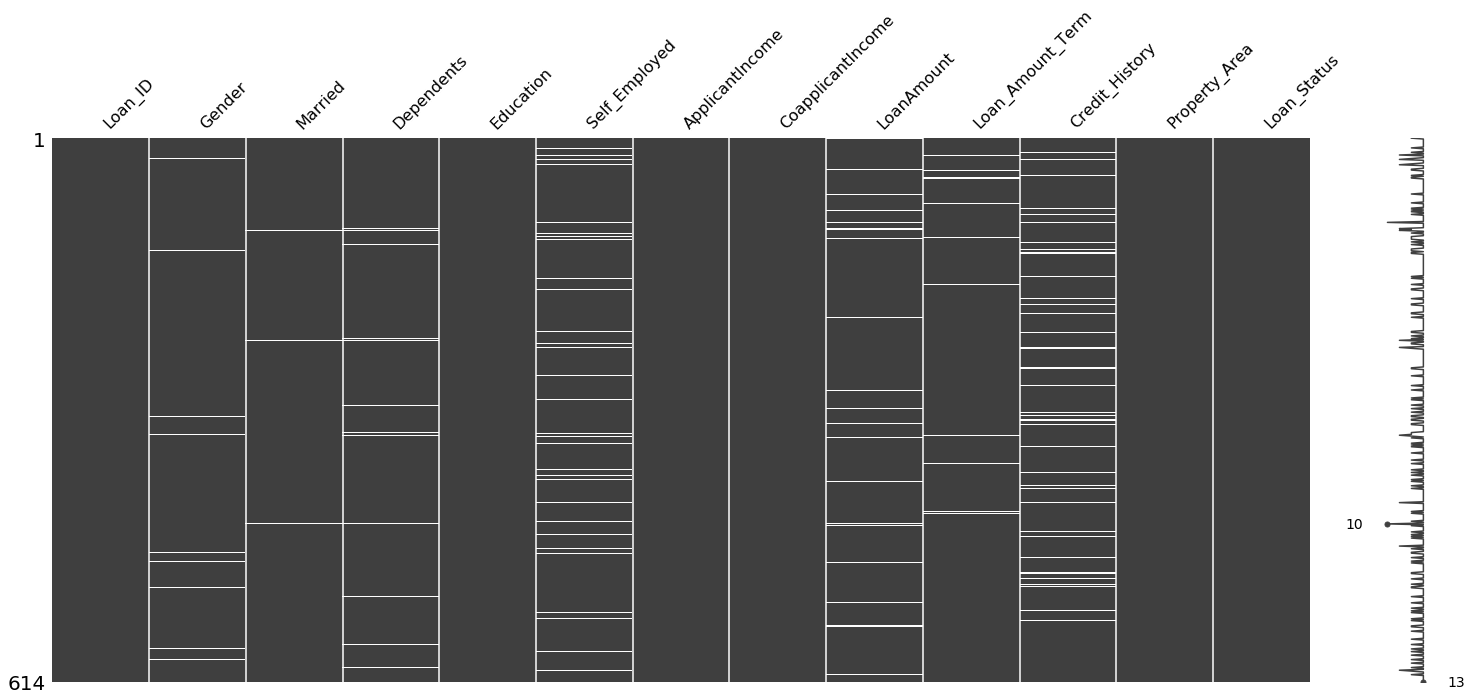

In [14]:
import missingno as msno
msno.matrix(df)

In [15]:
cols = ['Self_Employed','Credit_History']
df.loc[:,cols] = df.loc[:,cols].ffill()

In [17]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
df= df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 1 to 613
Data columns (total 13 columns):
Loan_ID              553 non-null object
Gender               553 non-null object
Married              553 non-null object
Dependents           553 non-null object
Education            553 non-null object
Self_Employed        553 non-null object
ApplicantIncome      553 non-null int64
CoapplicantIncome    553 non-null float64
LoanAmount           553 non-null float64
Loan_Amount_Term     553 non-null float64
Credit_History       553 non-null float64
Property_Area        553 non-null object
Loan_Status          553 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 60.5+ KB


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
df['Gender'] = le.fit_transform(df['Gender'].astype('str'))
df['Married'] = le.fit_transform(df['Married'].astype('str'))
df['Dependents'] = le.fit_transform(df['Dependents'].astype('str'))
df['Education'] = le.fit_transform(df['Education'].astype('str'))
df['Self_Employed'] = le.fit_transform(df['Self_Employed'].astype('str'))
df['Property_Area'] = le.fit_transform(df['Property_Area'].astype('str'))
df['Loan_Status'] = le.fit_transform(df['Loan_Status'].astype('str'))
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 1 to 613
Data columns (total 13 columns):
Loan_ID              553 non-null object
Gender               553 non-null int32
Married              553 non-null int32
Dependents           553 non-null int32
Education            553 non-null int32
Self_Employed        553 non-null int32
ApplicantIncome      553 non-null int64
CoapplicantIncome    553 non-null float64
LoanAmount           553 non-null float64
Loan_Amount_Term     553 non-null float64
Credit_History       553 non-null float64
Property_Area        553 non-null int32
Loan_Status          553 non-null int32
dtypes: float64(4), int32(7), int64(1), object(1)
memory usage: 45.4+ KB


In [30]:
data_x = df[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Credit_History','Property_Area']]
data_y = df['Loan_Status']

In [31]:
data_x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
1,1,1,1,0,0,4583,1508.0,128.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,1.0,2
5,1,1,2,0,1,5417,4196.0,267.0,1.0,2


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [33]:
X_train,X_test,y_train,y_test = train_test_split(data_x,data_y,stratify = data_y,test_size = 0.3,random_state = 10)

In [44]:
X_test.shape

(166, 10)

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
y_pred = lr.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [47]:
lr.score(X_test,y_pred)

1.0